In [0]:
import torch
from torch import nn,optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import torchvision.transforms as transforms
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
PATH_OF_DATA= '/content/gdrive/"My Drive/Colab Notebooks/dogs_cats_images/dataset"'
!ls {PATH_OF_DATA}

test_set  training_set


In [0]:
image_size=255

In [0]:
data_transforms = transforms.Compose([
                    transforms.Grayscale(num_output_channels=1),
                    transforms.Resize((image_size,image_size)),
                    transforms.ToTensor()])

In [0]:
train_datasets = datasets.ImageFolder(root= '/content/gdrive/My Drive/Colab Notebooks/dogs_cats_images/dataset/training_set', transform=data_transforms)
test_datasets = datasets.ImageFolder(root= '/content/gdrive/My Drive/Colab Notebooks/dogs_cats_images/dataset/test_set', transform=data_transforms)

In [0]:
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=256, shuffle=True, num_workers=2)
print(len(train_loader))
print(len(test_loader))

125
8


In [0]:
train=iter(train_loader)
images,labels=next(train)

In [0]:
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 255, 255])
torch.Size([64])


Text(0.5, 1.0, 'tensor(0)')

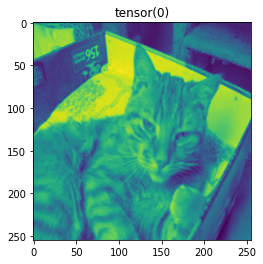

In [0]:
#plt.imshow(images[number].permute(1, 2, 0)) # to display colored images, RGB.
plt.imshow(images[6].view(image_size,image_size))
plt.title(labels[6])

In [0]:
class Everything(nn.Module):
  def __init__(self):
    super(Everything, self).__init__()
    self.hidden1=nn.Linear(65025,1344)
    self.hidden2=nn.Linear(1344,672)
    self.hidden3=nn.Linear(672,224)
    self.hidden4=nn.Linear(224,64)
    self.dropout=nn.Dropout(p=0.2)
    self.output=nn.Linear(64,2)
  def forward(self,x):
    x=self.dropout(F.relu(self.hidden1(x)))
    x=self.dropout(F.relu(self.hidden2(x)))
    x=self.dropout(F.relu(self.hidden3(x)))
    x=self.dropout(F.relu(self.hidden4(x)))
    x=F.log_softmax(self.output(x),dim=1) 
    return x

In [0]:
model=Everything()

In [0]:
torch.cuda.is_available()

True

In [0]:
use_cuda=True

In [0]:
if use_cuda and torch.cuda.is_available():
    model.cuda()

In [0]:
epochs=9

In [0]:
optimizer=optim.SGD(model.parameters(),lr=0.1)
criterion=nn.NLLLoss()

In [0]:
loss_at_epoch_training=np.array([])
loss_at_epoch_testing=np.array([])

In [0]:
for i in range(epochs):
  training_loss=0
  testing_loss=0
  for images,labels in train_loader:
    images = images.cuda()
    labels = labels.cuda()

    train_examples_data1=images.view(images.shape[0],-1)
    optimizer.zero_grad()

    logProbs=model(train_examples_data1)

    loss=criterion(logProbs,labels)

    loss.backward

    training_loss+=loss
    
    optimizer.step()
  with torch.no_grad():
    for images,labels in test_loader:
      images = images.cuda()
      labels = labels.cuda()
      test_examples_data2=images.view(images.shape[0],-1)

      logProbs=model(test_examples_data2)
        
      loss=criterion(logProbs,labels)

      testing_loss+=loss
  training_loss=training_loss/len(train_loader)
  testing_loss=testing_loss/len(test_loader)
  print("training_loss",training_loss)
  print("testing_loss",testing_loss)
  loss_at_epoch_training=np.append(loss_at_epoch_training,training_loss.cpu().detach().numpy())
  loss_at_epoch_testing=np.append(loss_at_epoch_testing,testing_loss.cpu().numpy())
  torch.save(model.state_dict,'model_dogvscat.pth')

training_loss tensor(0.6925, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6918, device='cuda:0')


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Everything. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


training_loss tensor(0.6906, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6865, device='cuda:0')
training_loss tensor(0.6855, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6915, device='cuda:0')
training_loss tensor(0.6828, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6816, device='cuda:0')
training_loss tensor(0.6776, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6733, device='cuda:0')
training_loss tensor(0.6723, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6692, device='cuda:0')
training_loss tensor(0.6684, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6748, device='cuda:0')
training_loss tensor(0.6678, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6735, device='cuda:0')
training_loss tensor(0.6622, device='cuda:0', grad_fn=<DivBackward0>)
testing_loss tensor(0.6703, device='cuda:0')


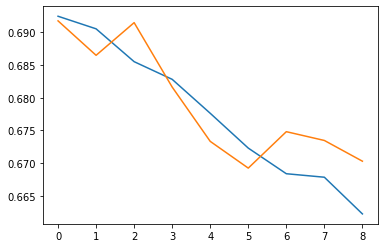

In [0]:
plt.plot(loss_at_epoch_training, label="training")
plt.plot(loss_at_epoch_testing, label="testing")
plt.show()

In [0]:
def PrintProbOutput(data):
  data=data.cpu().detach().numpy()
  x=torch.Tensor(range(0,2))
  print (data)
  print (x)
  #plt.bar(x.view(1,10),Probs)
  #sns.distplot(a=Probs,hist=True)
  plt.scatter(x.view(1,2),data)
  plt.ylim(0,1)
  plt.show

In [0]:
batch,(test_examples_data,test_examples_targets)=next(enumerate(test_loader))

In [0]:
if use_cuda and torch.cuda.is_available():
      test_examples_data = test_examples_data.cuda()
      test_examples_targets = test_examples_targets.cuda()
test_examples_data3=test_examples_data.view(test_examples_data.shape[0],1,-1)
test_examples_data3.shape

torch.Size([256, 1, 65025])

Text(0.5, 1.0, "tensor(0, device='cuda:0')")

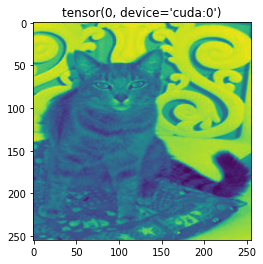

In [0]:
number=123
plt.imshow(test_examples_data[number].cpu().view(image_size,image_size))
plt.title(test_examples_targets[number])

tensor([[-0.8508, -0.5570]], device='cuda:0')
torch.Size([1, 2])
[[0.42706442 0.57293546]]
tensor([0., 1.])


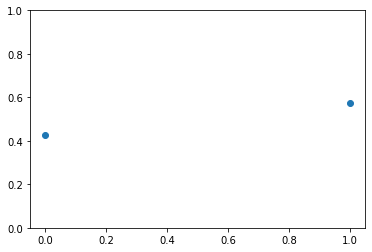

In [0]:
with torch.no_grad():
  output=model(test_examples_data3[5])
  print(output)
  output=torch.exp(output)
print(output.shape)
PrintProbOutput(output)

In [0]:
def CalculatedOutput(output):
  output=output.cpu().numpy()
  highest=-1
  rank=-1
  for i in range(len(output)):
    if output[i]>highest:
      highest=output[i]
      rank=i
  return np.array([rank])
def Accuracy(calc,exp):
  calc_output=np.array([])
  for i in range(256):
    calc_output=np.append(calc_output,CalculatedOutput(calc[i]))
  exp_output=exp.cpu().numpy() #Converts into an numpy array
  accuracy=100*(np.sum(calc_output==exp_output)/256)
  return accuracy

In [0]:
batch,(images,labels)=next(enumerate(test_loader))
images=images.cpu().view(images.shape[0],-1)
images=images.cuda()
labels=labels.cuda()
with torch.no_grad():
  output=model(images)
print("Accuracy of model",Accuracy(output,labels))

Accuracy of model 56.640625
